## Experimentation and run times analysis for LU factorizations
A procedure for decomposing an N×N matrix A into a product of a lower triangular matrix L and an upper triangular matrix U is called as LU decompostion.
$$ A = LU $$

Want a quick refresher on LU decomposition ? https://johnfoster.pge.utexas.edu/numerical-methods-book/LinearAlgebra_LU.html is a great resource! 

Here's what we are going to try!
* Implement LU factorization from scratch (non-optimized)
* Compare execution time between non-optimized implementation and SciPy pivoted LU implementation
* Compare execution time given different matrix densities

### LU factorization algorithm

**Step 1** Initialize  L  to an identity matrix,  I  of dimension  n×n  and  U=A

**Step 2** For  i=1,…,n  do Step 3

**Step 3** For  j=i+1,…,n  do Steps 4-5

**Step 4** Set  $l_{ji}=u_{ji}/u_{ii}$ 

**Step 5** Perform  $U_j=(U_j−l_{ji}U_i)$  (where  U_i,U_j  represent the  i  and  j  rows of the matrix  U , respectively)


In [1]:
import numpy as np
import timeit
import functools
import matplotlib.pyplot as plt
import scipy as sp
from scipy.linalg import lu
from scipy.sparse.linalg import splu

In [2]:
def lu_non_optimized_factorization(n):
    #Generate a random n x n matrix
    A = np.random.rand(n,n) 
    
    #Step 1: Initialize L to an identity matrix, I of dimension n×n and U=A
    L = np.identity(n)

    #Curious about the difference between np.copy and just assigning using = ? 
    #Read this : https://numpy.org/doc/stable/reference/generated/numpy.copy.html
    U = np.copy(A) 

    #Step 2:
    for i in range(n):
        #Step 3:
        for j in range(i+1,n):
            #Step 4:
            L[j][i] = U[j][i]/U[i][i]
            #Step 5:
            U[j,:] = U[j,:] - (L[j][i]*U[i,:])           
    

* Scipy documentation for LU factorization of dense matrices:  https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html

* Scipy documentation for LU factorization of sparse matrices: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.,→spilu.html#scipy.sparse.linalg.splu

Note: Scipy implementation computes pivoted LU decomposition of a matrix.

In [3]:
def lu_scipy_dense_factorization(n):    
    #Generate a random n x n matrix
    A = np.random.rand(n,n) 
    result =lu(A) # Using OOB Scipy implementation 
    
def lu_scipy_sparse_factorization25(n):    
    rand_matrix = sp.sparse.rand(n, n, density=0.25, format="csc")  #generate sparse matrix with 25% non-zero terms
    rand_matrix += sp.sparse.eye(n,format="csc")
    result = splu(rand_matrix)  # Using OOB Scipy implementation 
    
def lu_scipy_sparse_factorization50(n):    
    rand_matrix = sp.sparse.rand(n, n, density=0.5, format="csc") #generate sparse matrix with 50% non-zero terms
    rand_matrix += sp.sparse.eye(n,format="csc")
    result = splu(rand_matrix) # Using OOB Scipy implementation
    
def lu_scipy_sparse_factorization75(n):    
    rand_matrix = sp.sparse.rand(n, n, density=0.75, format="csc") #generate sparse matrix with 75% non-zero terms
    rand_matrix += sp.sparse.eye(n,format="csc")
    result = splu(rand_matrix) # Using OOB Scipy implementation 

Why timeit to time your functions?

* I loved the time function. Just save the time before you start the function before and after the execution of code and subtract them! But this method is not precise as there might be a background process momentarily running which disrupts the code execution and you will get significant variations in the running time of small code snippets.

* timeit runs your snippet of code millions of times (default value is 1000000) so that you get the statistically most relevant measurement of code execution time!

Learn more about timeit - https://docs.python.org/3/library/timeit.html

Note: To time a function which takes arguments, we need decorator to wrap that function with arguments into a function without arguments in order to pass it into timeit.timeit

In [4]:
def lu_factorization_wrapper(n):    
    return timeit.timeit(functools.partial(lu_non_optimized_factorization, n), number=runs)

def lu_scipy_dense_factorization_wrapper(n):
    return timeit.timeit(functools.partial(lu_scipy_dense_factorization, n), number=runs)

def lu_scipy_sparse_factorization25_wrapper(n):    
    return timeit.timeit(functools.partial(lu_scipy_sparse_factorization25, n), number=runs)

def lu_scipy_sparse_factorization50_wrapper(n):
    return timeit.timeit(functools.partial(lu_scipy_sparse_factorization50, n), number=runs)

def lu_scipy_sparse_factorization75_wrapper(n):
    return timeit.timeit(functools.partial(lu_scipy_sparse_factorization75, n), number=runs)

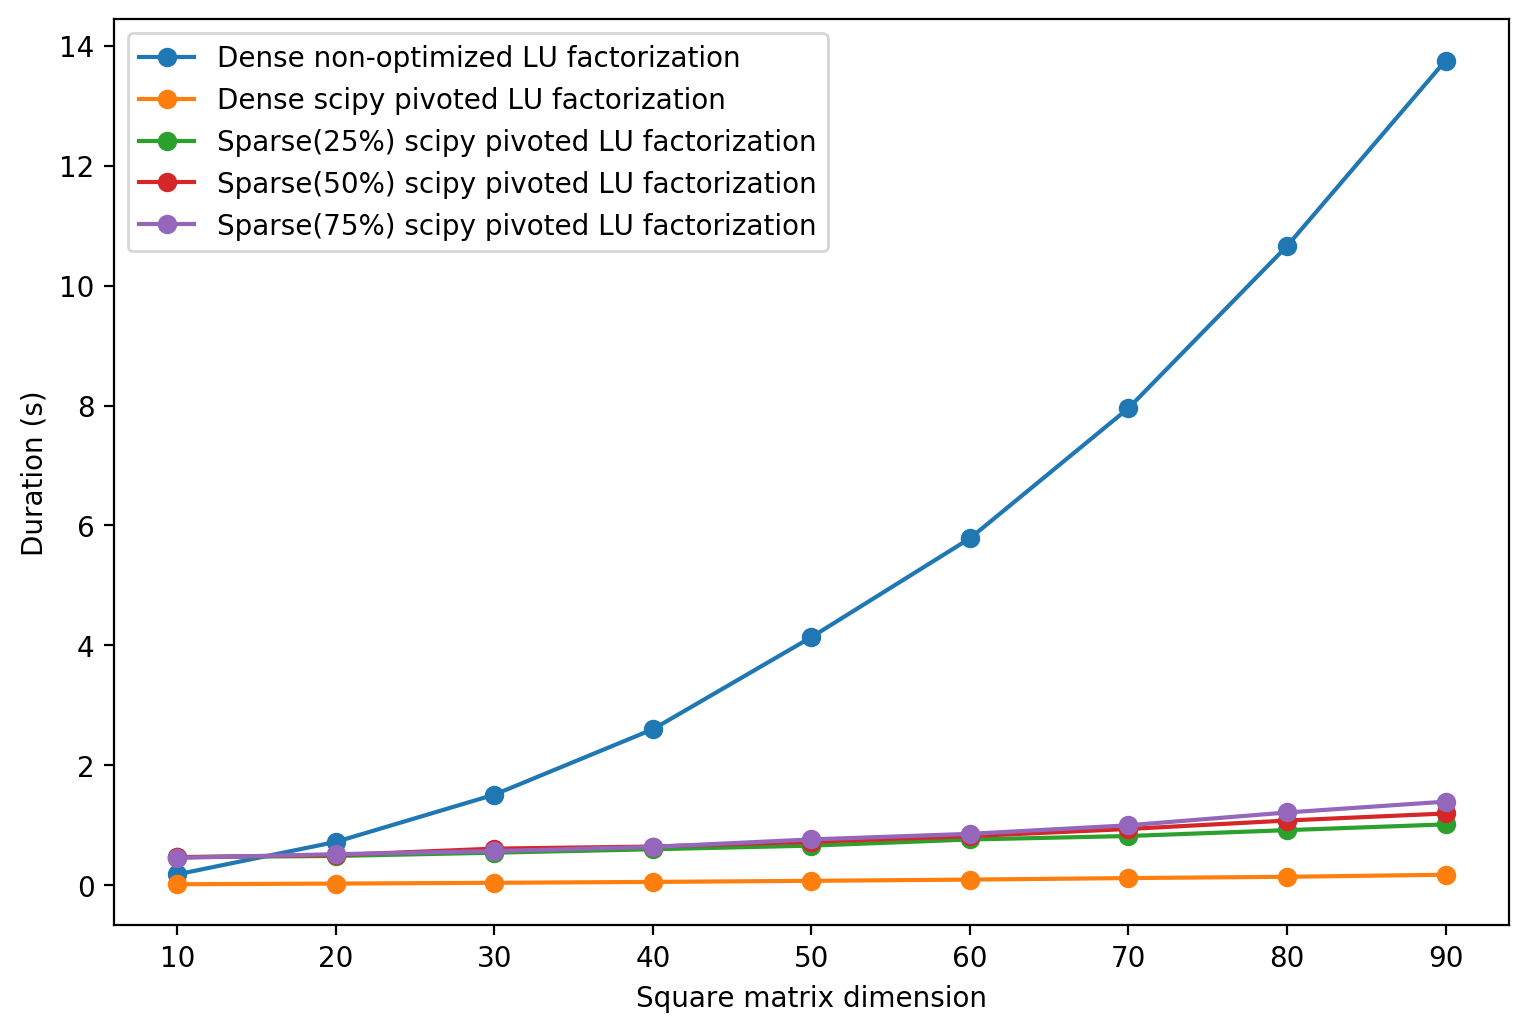

In [5]:
runs = 1000
sizes = range(10, 100, 10)
fig, ax = plt.subplots(dpi=200, figsize=(9,6))

ax.plot(
    sizes,[lu_factorization_wrapper(n) for n in sizes],
    marker="o", label="Dense non-optimized LU factorization",
)

ax.plot(
    sizes,[lu_scipy_dense_factorization_wrapper(n) for n in sizes],
    marker="o", label="Dense scipy pivoted LU factorization",
)
ax.plot(
    sizes,[lu_scipy_sparse_factorization25_wrapper(n) for n in sizes],
    marker="o", label="Sparse(25%) scipy pivoted LU factorization"
)
ax.plot(
    sizes, [lu_scipy_sparse_factorization50_wrapper(n) for n in sizes],
    marker="o", label="Sparse(50%) scipy pivoted LU factorization"
)
ax.plot(
    sizes,[lu_scipy_sparse_factorization75_wrapper(n) for n in sizes],
    marker="o", label="Sparse(75%) scipy pivoted LU factorization"
)
ax.set_xlabel("Square matrix dimension")
ax.set_ylabel("Duration (s)")
ax.set_title("LU Factorization Runtime Comparision")
plt.legend()
plt.show()

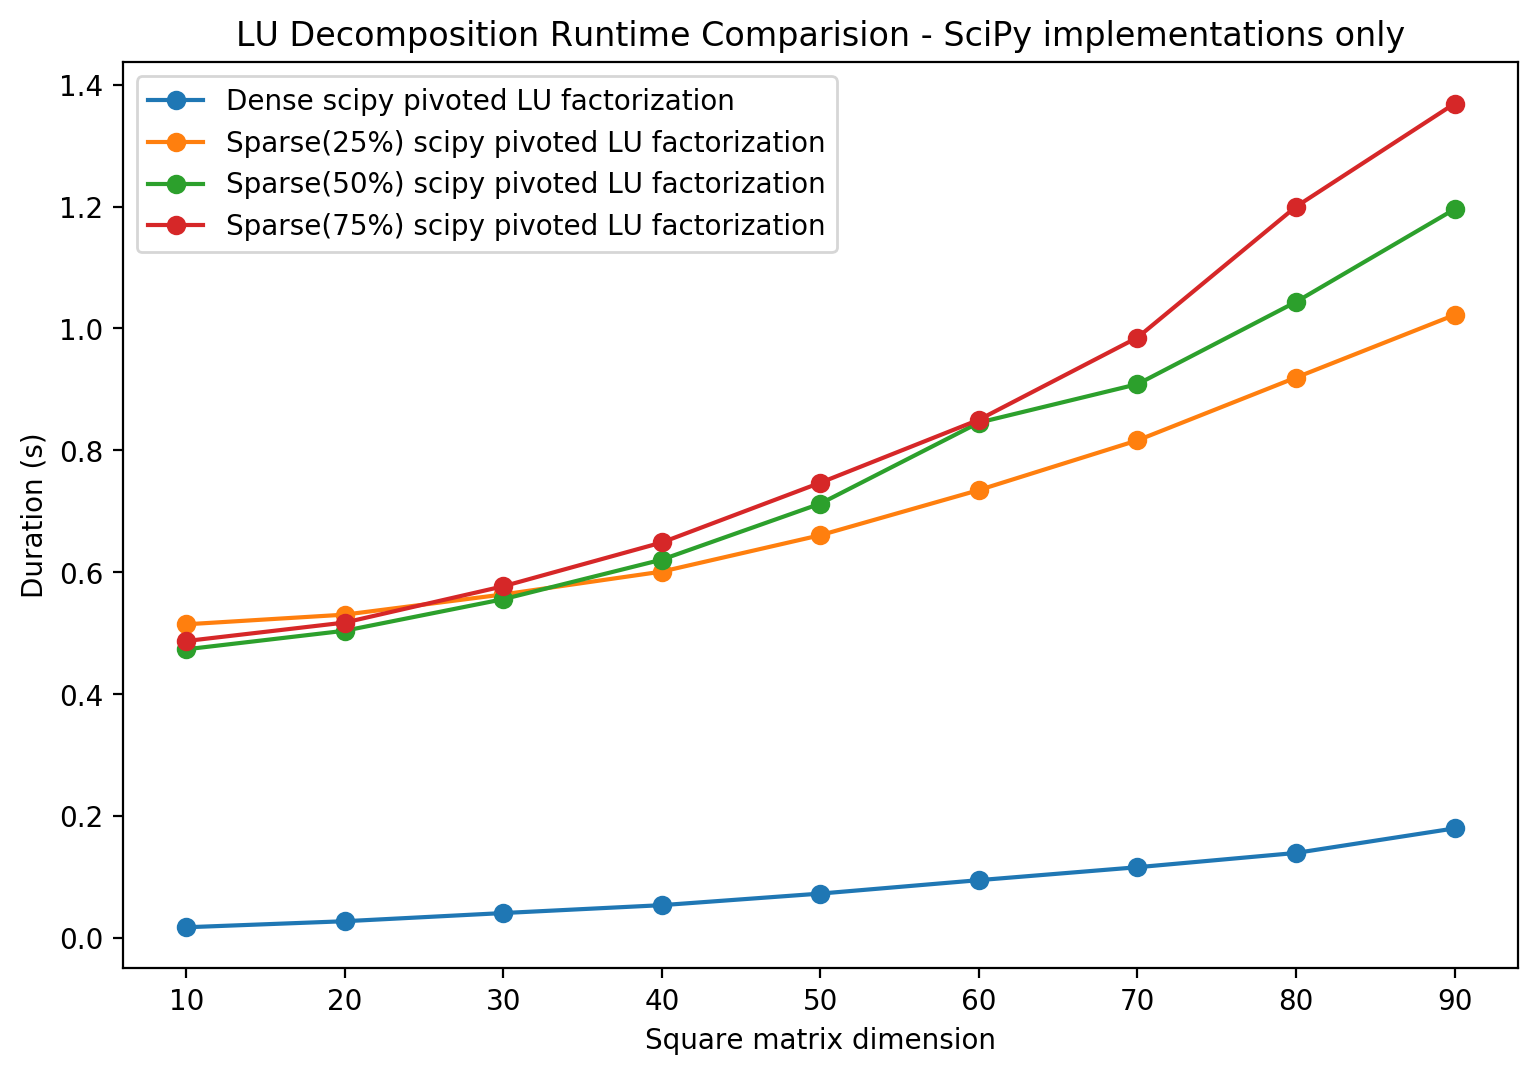

In [6]:
runs = 1000
sizes = range(10, 100, 10)
fig, ax = plt.subplots(dpi=200, figsize=(9,6))

ax.plot(
    sizes,[lu_scipy_dense_factorization_wrapper(n) for n in sizes],
    marker="o", label="Dense scipy pivoted LU factorization",
)
ax.plot(
    sizes,[lu_scipy_sparse_factorization25_wrapper(n) for n in sizes],
    marker="o", label="Sparse(25%) scipy pivoted LU factorization"
)
ax.plot(
    sizes, [lu_scipy_sparse_factorization50_wrapper(n) for n in sizes],
    marker="o", label="Sparse(50%) scipy pivoted LU factorization"
)
ax.plot(
    sizes,[lu_scipy_sparse_factorization75_wrapper(n) for n in sizes],
    marker="o", label="Sparse(75%) scipy pivoted LU factorization"
)
ax.set_xlabel("Square matrix dimension")
ax.set_ylabel("Duration (s)")
ax.set_title("LU Decomposition Runtime Comparision - SciPy implementations only")
plt.legend()
plt.show()

#### Food for thought

"Applied Linear Algebra and Matrix Analysis" by Thomas S. Shores states that - The number of flops required to solve a linear system of n equations in n unknowns using Gaussian or Gauss–Jordan elimination without row exchanges is approximately $2n^3/3$. All the plots above do exhibit exponential behavior, but, relationship between n and the execution time doesnt seem strongly cubic, specifically for the sparse matrices.  As you see, the sparse matricies have a higher execution time compared to dense matrices of the same dimension. This is very likely due to the memory structure of the sparse matrices (Interesting post on this - https://machinelearningmastery.com/sparse-matrices-for-machine-learning/ )